Importing libaries

In [16]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Import Dataset

In [2]:
df = pd.read_csv("D:\Thesis\Dataset\Breast cancer categorical Kaggle dataset\Breast_Cancer.csv")

Display Dataset

In [3]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


Find out number of instances and class label unique values

In [4]:
print(('Total Data:'+str(len(df))))
print(df['Status'].value_counts())

Total Data:4024
Alive    3408
Dead      616
Name: Status, dtype: int64


Find out null values

In [5]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

Change the target value into 0 and 1 using label encoder, Alive =0, Dead = 1

In [6]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

Display Dataset

In [7]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,0
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,0


Assign target value into y variable

In [8]:
y = df['Status']

Change categorical values with numerical values using label encoder

In [9]:
print(df.dtypes==object)
df['Race'] = le.fit_transform(df['Race'])
df['Marital Status']=le.fit_transform(df['Marital Status'])
df['T Stage ']=le.fit_transform(df['T Stage '])
df['N Stage']=le.fit_transform(df['N Stage'])
df['6th Stage']=le.fit_transform(df['6th Stage'])
df['differentiate']=le.fit_transform(df['differentiate'])
df['Grade']=le.fit_transform(df['Grade'])
df['A Stage']=le.fit_transform(df['A Stage'])
df['Estrogen Status']=le.fit_transform(df['Estrogen Status'])
df['Progesterone Status']=le.fit_transform(df['Progesterone Status'])

Age                       False
Race                       True
Marital Status             True
T Stage                    True
N Stage                    True
6th Stage                  True
differentiate              True
Grade                      True
A Stage                    True
Tumor Size                False
Estrogen Status            True
Progesterone Status        True
Regional Node Examined    False
Reginol Node Positive     False
Survival Months           False
Status                    False
dtype: bool


In [10]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


Split data into training and test set

In [11]:
X = df.drop(['Status'], axis=1)
(X_train, X_test, y_train, y_test)=train_test_split(X,y,test_size=0.2, stratify=y)

Show the distribution of training and test set

In [12]:
print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Test set data len:'+str(len(X_test)))
print('Class distribution'+ str(Counter(y_test)))

Train data len:3219
Class distributionCounter({0: 2726, 1: 493})
Test set data len:805
Class distributionCounter({0: 682, 1: 123})


Apply Bernoulli Naive Bayes classifier

In [13]:
Bernoulli_classifer = BernoulliNB()
# training the model
Bernoulli_classifer.fit(X_train, y_train)
# testing the model
B_y_pred = Bernoulli_classifer.predict(X_test)
print(classification_report(y_test, B_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       682
           1       0.44      0.20      0.27       123

    accuracy                           0.84       805
   macro avg       0.66      0.58      0.59       805
weighted avg       0.80      0.84      0.81       805



[[652  30]
 [ 99  24]]


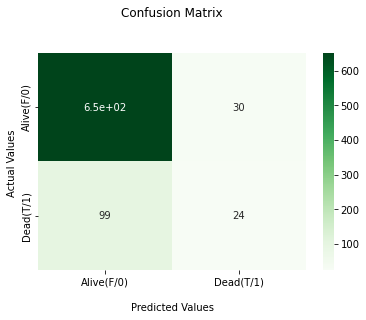

In [24]:
# passing actual and predicted values
cm = confusion_matrix(y_test, B_y_pred)
print(cm)
# true write data values in each cell of the matrix
ax = sns.heatmap(cm, annot=True, cmap='Greens')
#plt.savefig('confusion.png',display_labels=['Alive', 'Dead'])
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Alive(F/0)','Dead(T/1)'])
ax.yaxis.set_ticklabels(['Alive(F/0)','Dead(T/1)'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [40]:
# create a Gaussian Classifier
Gauss_classifer = GaussianNB()
# training the model
Gauss_classifer.fit(X_train, y_train)
# testing the model
G_y_pred = Gauss_classifer.predict(X_test)
print(classification_report(y_test, G_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       682
           1       0.39      0.46      0.42       123

    accuracy                           0.81       805
   macro avg       0.64      0.66      0.65       805
weighted avg       0.82      0.81      0.81       805



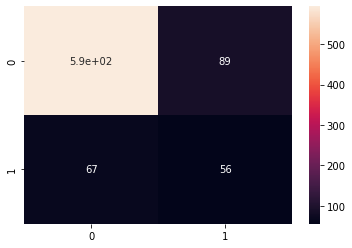

In [41]:
# passing actual and predicted values
cm = confusion_matrix(y_test, G_y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Apply logistic regression

In [42]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
L_y_pred = lr.predict(X_test)
print(classification_report(y_test, L_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       682
           1       0.81      0.42      0.56       123

    accuracy                           0.90       805
   macro avg       0.86      0.70      0.75       805
weighted avg       0.89      0.90      0.88       805



C:\Users\cse_s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


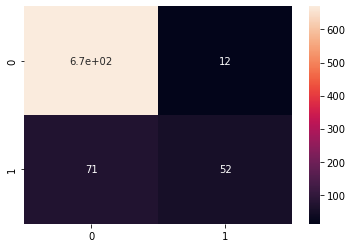

In [43]:
# passing actual and predicted values
cm = confusion_matrix(y_test, L_y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Apply Multilayer perceptron

In [44]:
model = MLPClassifier(random_state=1, max_iter=300)
model.fit(X_train, y_train)
model_y_pred = model.predict(X_test)
print(classification_report(y_test, model_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       682
           1       0.75      0.38      0.51       123

    accuracy                           0.89       805
   macro avg       0.82      0.68      0.72       805
weighted avg       0.87      0.89      0.87       805



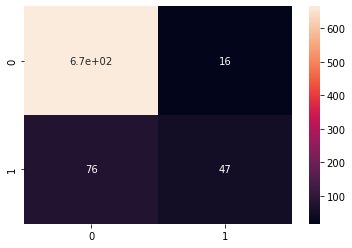

In [45]:
# passing actual and predicted values
cm = confusion_matrix(y_test, model_y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [ ]:
Apply Random Forest

In [46]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
R_y_pred = clf.predict(X_test)
print(classification_report(y_test, R_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       682
           1       0.82      0.45      0.58       123

    accuracy                           0.90       805
   macro avg       0.86      0.71      0.76       805
weighted avg       0.89      0.90      0.89       805



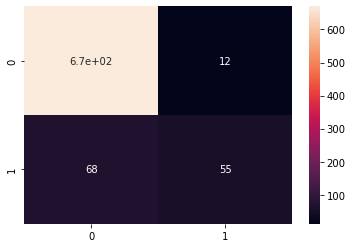

In [47]:
# passing actual and predicted values
cm = confusion_matrix(y_test, R_y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [ ]:
Apply Bagging

In [48]:
B_model = BaggingClassifier()
B_model.fit(X_train, y_train)
Ba_y_pred = B_model.predict(X_test)
print(classification_report(y_test, Ba_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       682
           1       0.77      0.41      0.54       123

    accuracy                           0.89       805
   macro avg       0.84      0.70      0.74       805
weighted avg       0.88      0.89      0.88       805



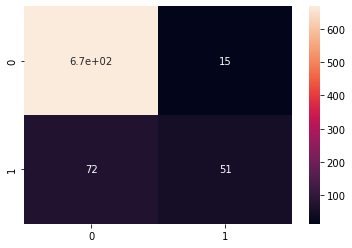

In [49]:
# passing actual and predicted values
cm = confusion_matrix(y_test, Ba_y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

XGBboost classifier

In [53]:
XG_model = XGBClassifier()
XG_model.fit(X_train, y_train)
XG_y_pred = XG_model.predict(X_test)
print(classification_report(y_test, XG_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       682
           1       0.74      0.46      0.56       123

    accuracy                           0.89       805
   macro avg       0.82      0.71      0.75       805
weighted avg       0.88      0.89      0.88       805



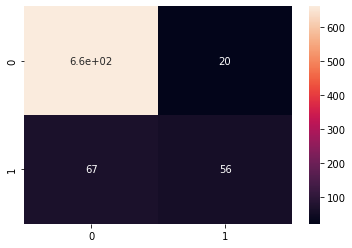

In [54]:
# passing actual and predicted values
cm = confusion_matrix(y_test, XG_y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')